> ### **6. Using the Best Accuracy Model**
- On other test data

In [ ]:
pip install d2l

In [ ]:
pip install matplotlib==3.1.3

In [3]:
%matplotlib inline
import os
import gc
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from torch import nn
from d2l.torch import *
from d2l import torch as d2l
from torch.nn import functional as F
from torch.utils.data import DataLoader

In [4]:
def loss(inputs, targets):
  return F.cross_entropy(inputs, targets, reduction='none').mean(1).mean(1)

def predict(img):
  X = test_iter.dataset.normalize_image(img).unsqueeze(0)
  pred = net(X.to(devices[0])).argmax(dim=1)
  return pred.reshape(pred.shape[1], pred.shape[2])

def label2image(pred):
  colormap = torch.tensor(d2l.VOC_COLORMAP, device=devices[0])
  X = pred.long()
  return colormap[X, :]

In [5]:
# Load Dataset(Pascal VOC2012)
batch_size, crop_size = 8, (320,480)
train_iter,test_iter = d2l.load_data_voc(batch_size, crop_size)

read 1114 examples
read 1078 examples


In [ ]:
# Efficientnet_b6 Network
pretrained_net = torchvision.models.efficientnet_b6(pretrained=True)
net = nn.Sequential(*list(pretrained_net.children())[:-2])

num_classes = 21
net.add_module('final_0', nn.Conv2d(2304, num_classes, kernel_size=1))
net.add_module('UpSample', nn.Upsample(scale_factor=32, mode='bilinear', align_corners=False))
net.add_module('final_1', nn.Sequential(nn.Conv2d(num_classes, num_classes, kernel_size=3, padding=1)))

# Define Parameters / lr(0.02), num_epochs(20)
num_epochs, lr, wd, devices = 20, 0.02, 1e-3, d2l.try_all_gpus()

loss 0.149, train acc 0.946, test acc 0.892
4.5 examples/sec on [device(type='cuda', index=0)]


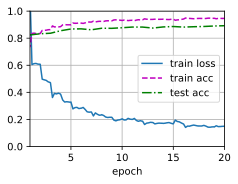

In [7]:
# Train the model(Takes about 104 min)
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd)
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

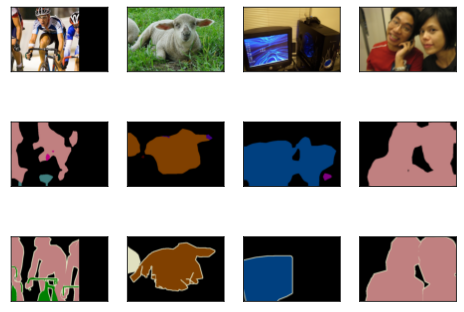

In [8]:
# Test Result : Try other test data
voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')
test_images, test_labels = d2l.read_voc_images(voc_dir, False)
n, imgs = 4, []

for i in range(4,8):
  crop_rect = (0, 0, 320, 480)
  X = torchvision.transforms.functional.crop(test_images[i], *crop_rect)
  pred = label2image(predict(X))
  imgs += [
    X.permute(1, 2, 0),
    pred.cpu(),
    torchvision.transforms.functional.crop(test_labels[i],*crop_rect).permute(1, 2, 0)]

d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2);

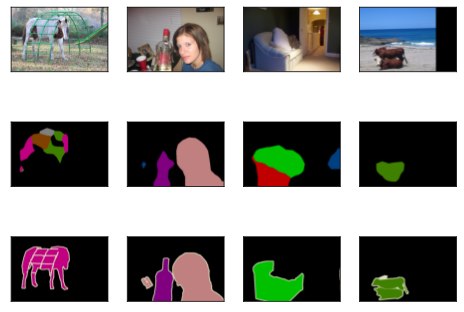

In [9]:
# Test Result : Try other test data
voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')
test_images, test_labels = d2l.read_voc_images(voc_dir, False)
n, imgs = 4, []

for i in range(8,12):
  crop_rect = (0, 0, 320, 480)
  X = torchvision.transforms.functional.crop(test_images[i], *crop_rect)
  pred = label2image(predict(X))
  imgs += [
    X.permute(1, 2, 0),
    pred.cpu(),
    torchvision.transforms.functional.crop(test_labels[i],*crop_rect).permute(1, 2, 0)]

d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2);